# Classification Predictions of Census Income 1994 Data

#### Goal: Predicting whether income exceeds $50,000/yr based on census data.
Training and testing data can be downloaded from my GitHub repository: 
[training ](https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/census_1994_adult.data)
[ testing](https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/census_1994_adult.test)


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config Completer.use_jedi = False

In [2]:
# reading in training dataset from github repository
url = "https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/census_1994_adult.data"
col_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
             "relationship", "race", "sex", "capital-gain","capital-loss", "hrs-per-wk", "native-country",
             "greater_than_50k"]
census_data = pd.read_csv(url, names = col_names)

The dataset did not contain column names. I assigned the column names using the data dictionary provided by the UCI Machine Learning Repository site.

In [3]:
# shuffling dataset
census_data = census_data.sample(frac = 1).reset_index(drop = True)

In [4]:
# first five rows
census_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-wk,native-country,greater_than_50k
0,24,Private,149457,Some-college,10,Never-married,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
1,47,Private,169388,11th,7,Divorced,Other-service,Unmarried,White,Female,0,0,15,United-States,<=50K
2,46,Self-emp-inc,191978,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,50,United-States,>50K
3,26,Private,182308,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
4,29,Private,163167,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,40,United-States,<=50K


In [5]:
# general variable info
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education-num     32561 non-null  int64 
 5   marital-status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital-gain      32561 non-null  int64 
 11  capital-loss      32561 non-null  int64 
 12  hrs-per-wk        32561 non-null  int64 
 13  native-country    32561 non-null  object
 14  greater_than_50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# counting number of nulls
null_count = census_data.isna().sum()
null_count[null_count > 0].sort_values(ascending = False)

Series([], dtype: int64)

No null values present.

In [7]:
# creating function to count categorical values
def count_categorical(dataset):
    for col in dataset.columns:
        if dataset[col].dtype == np.dtype('O'):
            col_count = dataset[col].value_counts()
            print(col_count, "\n")
        else:
            pass

In [8]:
# printing column names
for col in census_data.columns:
        print(col)

age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hrs-per-wk
native-country
greater_than_50k


In [9]:
# counting values by category for object data types
count_categorical(census_data)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64 

 Prof-specialty       4140
 Craft-repair         4099
 Exec-mana

A few instanes of "?" in some variables. It most likely represents N/A or unknown. The target variable also shows people make less than 50k three times more than people who make over 50k.

In [10]:
# retrieving general statistics for numerical variables
census_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hrs-per-wk
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Nothing to unusual regarding numerical variables.

In [11]:
# importing scipy.stats entropy
from scipy.stats import entropy

# creating function to calculate entropy
def cal_entropy(dataset, log_base = 2.718281828459):
    entropy_dict = {}
    for vect in dataset.columns:
        if dataset[vect].dtype == np.dtype('O'):
            vect_rel_prob = dataset[vect].value_counts() / len(dataset[vect])
            vect_entropy = entropy(vect_rel_prob, base = log_base)
            entropy_dict[vect] = vect_entropy
        else:
            pass
    return(entropy_dict)

In [12]:
# creating dictionary to store results
ig_dict = cal_entropy(census_data.iloc[:, :-1], 2)

# calculating information gain and storing a dataframe
info_gain = (
    pd.DataFrame(list(ig_dict.items()), columns = ["features", "IG"]).
    sort_values(by = ["IG"], ascending = False)
)
info_gain.reset_index(inplace = True, drop = True)
info_gain

,features,IG
0,occupation,3.516903
1,education,2.931351
2,relationship,2.154424
3,marital-status,1.833649
4,workclass,1.647977
5,native-country,0.943795
6,sex,0.915736
7,race,0.798741


This first few instances might be useful. Let's see if they appear in the correlation results.

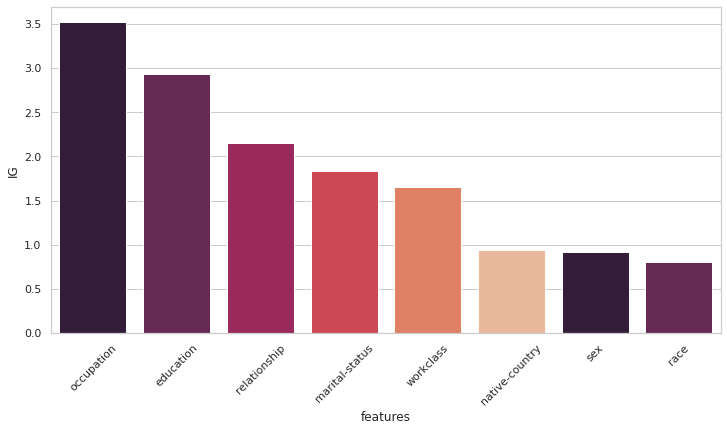

In [13]:
# visualizing information gain
plt.figure(figsize = (12,6))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(x = "features", y = "IG", data = info_gain, 
                 palette = sns.color_palette("rocket"))
plt.xticks(rotation = 45)
plt.show()

<Figure size 864x432 with 0 Axes>

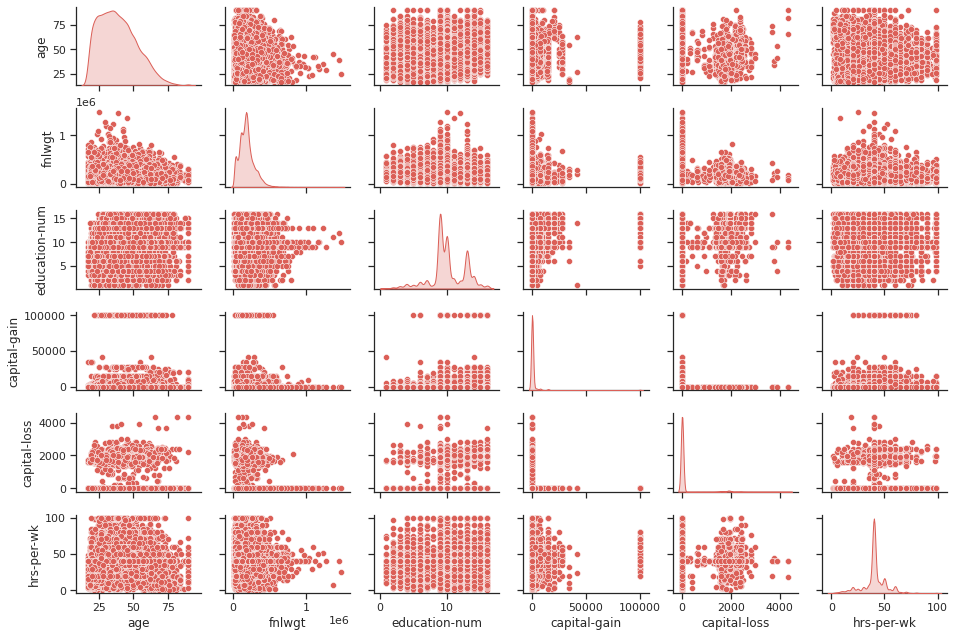

In [14]:
# numerical vairables corrleation and distributions
plt.style.use("fivethirtyeight")
plt.figure(figsize = (12,6))
sns.set_theme(style = "ticks")
sns.set_palette(sns.color_palette("hls", 8))
sns.pairplot(data = census_data, diag_kind = "kde", height = 1.5, aspect = 1.5)
plt.show()

In [15]:
# converting categorical values to numerical to see relationships 
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
census_encoded = pd.DataFrame() 

for i in census_data.columns :
  census_encoded[i] = label.fit_transform(census_data[i])

relationship     -0.250918
marital-status   -0.199307
fnlwgt           -0.010549
native-country    0.015840
workclass         0.051604
race              0.071846
occupation        0.075468
education         0.079317
capital-loss      0.162514
sex               0.215980
hrs-per-wk        0.232393
age               0.234134
education-num     0.335154
capital-gain      0.340016
Name: greater_than_50k, dtype: float64


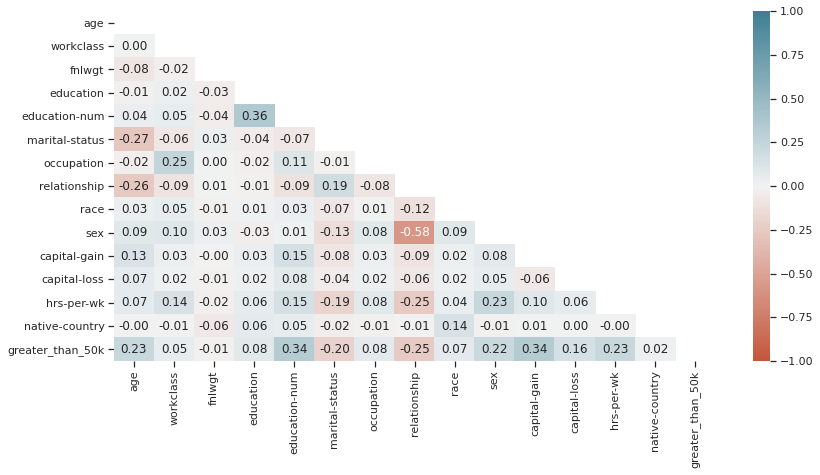

In [16]:
# Creating correlation matrix
corr_matrix = census_encoded.corr()
print(corr_matrix["greater_than_50k"].sort_values()[:-1])

# visualizing it
plt.figure(figsize = (12,6))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask = mask, annot = True, vmin = -1, vmax = 1, 
            cmap = sns.diverging_palette(20, 220, as_cmap=True), fmt = ".2f")
plt.show()

There are plently of variables with at least minor correlation **(abs >= 0.15)** to the target variable. The majority of these will be used in the Logistic classifier and Gaussian Naive Bayes models.

## Machine Learning Pipeline

First, I will import necessary packages and modules from scikit-learn.

In [17]:
# importing scikit-learn packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

Dividing dataset into features and target variables.

In [18]:
# features
X_train = census_data[["age", "education-num", "marital-status", "relationship", "sex",
                 "capital-gain", "capital-loss", "hrs-per-wk", "occupation", "race"]]
print(X_train.shape)

# target
y_train = census_data["greater_than_50k"]
print(y_train.shape)

(32561, 10)
(32561,)


In [19]:
# reading in test dataset from github repository
url = "https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/census_1994_adult.test"
col_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
             "relationship", "race", "sex", "capital-gain","capital-loss", "hrs-per-wk", "native-country",
             "greater_than_50k"]
census_test_data = pd.read_csv(url, names = col_names, skiprows = 1)

In [20]:
# test features
X_test = census_test_data[["age", "education-num", "marital-status", "relationship", "sex",
                 "capital-gain", "capital-loss", "hrs-per-wk", "occupation", "race"]]
print(X_test.shape)

# test target
y_test = census_test_data["greater_than_50k"]
print(y_test.shape)

(16281, 10)
(16281,)


In [21]:
# checking target values
y_test.value_counts()

 <=50K.    12435
 >50K.      3846
Name: greater_than_50k, dtype: int64

In [22]:
# removing decimals in string
y_test = y_test.str.rstrip(".")

In [23]:
# checking target values
y_test.value_counts()

 <=50K    12435
 >50K      3846
Name: greater_than_50k, dtype: int64

Importing imputer and encoding classes from scikit-learn.

In [24]:
# creating Simple Imputer, OneHot Encoder, and Standard Scaler objects
simple_imp = SimpleImputer(strategy = "median")
constant_imp = SimpleImputer(strategy = "most_frequent")
ohe = OneHotEncoder(handle_unknown = "ignore")
scaler = StandardScaler()

In [25]:
# listing column types
census_data.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
education-num        int64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain         int64
capital-loss         int64
hrs-per-wk           int64
native-country      object
greater_than_50k    object
dtype: object

Creating pipelines for catergorical and numerical variables.

In [26]:
# creating pipeline for categorical variable transformations
imp_ohe = make_pipeline(constant_imp, ohe)

In [27]:
# creating pipeline for numerical variable transformations
imp_std = make_pipeline(simple_imp, scaler)

Creating a column transformer to facilitate variable transformations.

In [28]:
# transforming variables using a column transformer
ct_imputer = make_column_transformer(
    (imp_ohe, ["marital-status", "relationship", "sex", "occupation", "race"]),
    (imp_std, ["age", "education-num", "hrs-per-wk", "capital-gain", "capital-loss"])
)

In [29]:
# creating an instance of logistic regression classifier
logreg = LogisticRegression(max_iter = 400)

Creating a pipeline using a logistic regression model.

In [30]:
# creating a pipeline
pipe = make_pipeline(ct_imputer, logreg)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital-status',
                                                   'relationship', 'sex',
                                                   'occupation', 'race']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                           

In [31]:
# using cross val score function to test model accuracy
from sklearn.model_selection import cross_val_score
round(cross_val_score(pipe, X_train, y_train, cv = 5, scoring = "accuracy").mean(), 3)

0.85

In [32]:
# retrieving named steps in the pipeline
pipe.named_steps.keys()

dict_keys(['columntransformer', 'logisticregression'])

Hyperparamter tuning is important so I will specify a few parameters to use in a grid search.

In [33]:
# specifying hypertuning parameters to use in a grid search
params = {}
params["logisticregression__penalty"] = ["l1", "l2"]
params["logisticregression__random_state"] = [1]
params["logisticregression__solver"] = ["liblinear"]

In [34]:
# creating grid search CV instance
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv = 5, scoring = "accuracy")
grid.fit(X_train, y_train);

In [35]:
# displaying grid search results
results = pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").reset_index(drop = True)[:10]
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__penalty,param_logisticregression__random_state,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.811713,0.427379,0.030795,0.00544,l1,1,liblinear,"{'logisticregression__penalty': 'l1', 'logisti...",0.849378,0.848280,0.856726,0.844748,0.852426,0.850312,0.004039,1
1,0.246164,0.015058,0.029386,0.00236,l2,1,liblinear,"{'logisticregression__penalty': 'l2', 'logisti...",0.849071,0.847973,0.856419,0.844748,0.852733,0.850189,0.004026,2


In [36]:
# printing best score and parameters
print("best score:", round(grid.best_score_, 2), "\n", "best parameters:", grid.best_params_, sep = "\n")

best score:
0.85


best parameters:
{'logisticregression__penalty': 'l1', 'logisticregression__random_state': 1, 'logisticregression__solver': 'liblinear'}


A mean score of 0.85 is good. Hopefully, the model performs just as well or better on the true holdout set.

In [37]:
# predicting passenger survival probabilities
pred_probs = grid.predict_proba(X_test)

In [38]:
# predicting passenger outcome
pred_out = grid.predict(X_test)

In [39]:
# concatenating target values and prediction probabilities
pred_results = pd.DataFrame(pred_probs, columns = ["less_or_equal_prob", "greather_than_prob"])
pred_results = pred_results.apply(lambda x: round(x, 2))
pred_results.insert(0, "greater_than_50k", pred_out, True)
pred_results.head(10)

,greater_than_50k,less_or_equal_prob,greather_than_prob
0,<=50K,1.00,0.00
1,<=50K,0.90,0.10
2,<=50K,0.56,0.44
3,>50K,0.24,0.76
4,<=50K,1.00,0.00
5,<=50K,1.00,0.00
6,<=50K,0.99,0.01
7,>50K,0.09,0.91
8,<=50K,1.00,0.00
9,<=50K,0.96,0.04


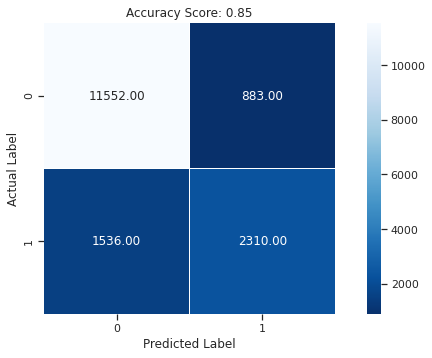

In [40]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_out)

plt.figure(figsize = (10,5))
sns.heatmap(cm, annot = True, fmt = ".2f", linewidths = .5, square = True,  cmap = "Blues_r");
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
plt.title("Accuracy Score: {:.2f}".format(round((cm[0, 0] + cm [1, 1]) / (np.sum(cm)),2)));

Great! The model performed just as well on the true holdout set provided by the UCI Machine Learning repository. Let's see how this model compares to the Naive Bayes classifier.

Some features were added or changed.

In [41]:
# features
X_train = census_data[["age", "education-num", "marital-status", "relationship", "sex",
                 "capital-gain", "capital-loss", "hrs-per-wk", "occupation", "race"]]
print(X_train.shape)

# target
y_train = census_data["greater_than_50k"]
print(y_train.shape)

(32561, 10)
(32561,)


In [42]:
# test features
X_test = census_test_data[["age", "education-num", "marital-status", "relationship", "sex",
                 "capital-gain", "capital-loss", "hrs-per-wk", "occupation", "race"]]
print(X_test.shape)

# test target
y_test = census_test_data["greater_than_50k"]
print(y_test.shape)

(16281, 10)
(16281,)


In [43]:
# removing decimals in string
y_test = y_test.str.rstrip(".")

In [44]:
# creating an instance of Naive Bayessian classifier
gaussian_nb = GaussianNB()

In [45]:
# creating Simple Imputer, OneHot Encoder, and Standard Scaler objects
simple_imp = SimpleImputer(strategy = "median")
constant_imp = SimpleImputer(strategy = "most_frequent")
ohe = OneHotEncoder(handle_unknown = "ignore", sparse = False)
scaler = StandardScaler()

In [46]:
# creating pipeline for categorical variable transformations
imp_ohe = make_pipeline(constant_imp, ohe)

In [47]:
# creating pipeline for numerical variable transformations
imp_std = make_pipeline(simple_imp, scaler)

In [48]:
# transforming variables using a column transformer
ct_imputer = make_column_transformer(
    (imp_ohe, ["marital-status", "relationship", "sex", "occupation", "race"]),
    (imp_std, ["age", "education-num", "hrs-per-wk", "capital-gain", "capital-loss"])
)

In [49]:
# creating a pipeline
pipe = make_pipeline(ct_imputer, gaussian_nb)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['marital-status',
                                                   'relationship', 'sex',
                                                   'occupation', 'race']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                  

In [50]:
# specifying hypertuning parameters to use in a grid search
params = {} # none at the moment

In [51]:
# creating grid search CV instance
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv = 5, scoring = "accuracy")
grid.fit(X_train, y_train);

In [52]:
# displaying grid search results
results = pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").reset_index(drop = True)[:10]
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.161268,0.009068,0.032833,0.005124,{},0.760633,0.761057,0.701935,0.699478,0.766585,0.737937,0.030481,1


In [53]:
# printing best score and parameters
print("best score:", round(grid.best_score_, 2), "\n", "best parameters:", grid.best_params_, sep = "\n")

best score:
0.74


best parameters:
{}


A mean score of 0.74. The accuracy is not terrible, but it is not as good the logisitic regression classifier. Let's see the accuracy performance on the true holdout set.

In [54]:
# predicting passenger outcome
pred_out = grid.predict(X_test)

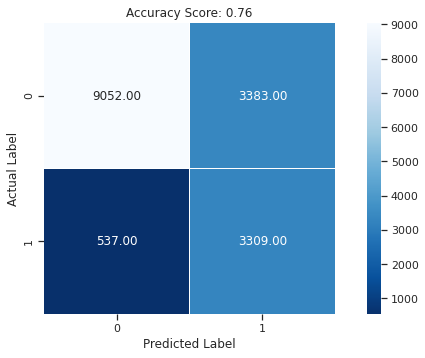

In [55]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_out)

plt.figure(figsize = (10,5))
sns.heatmap(cm, annot = True, fmt = ".2f", linewidths = .5, square = True,  cmap = "Blues_r");
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
plt.title("Accuracy Score: {:.2f}".format(round((cm[0, 0] + cm [1, 1]) / (np.sum(cm)),2)));

The Naive Bayes model performed slightly better on the true holdout set 0.76.
This model could have performed better if I had the proper knowledge to tune some parameters correctly or performed feature-engineering.
The logistic regression classifier is a good model to use for this dataset. I think more advance models can improve the accuracy above 90%.